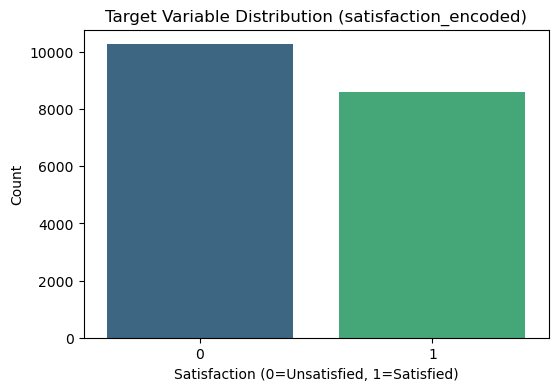

Dropping 10 highly correlated features: ['Total_Service_Score', 'Comfort_Score', 'Total_Delay_Minutes', 'Long_Haul_Flight', 'Estimated_Flight_Hours', 'Business_Travel_Premium', 'Age_Group', 'Experience_Expectation', 'Service_to_Delay_Ratio', 'Delay_Impact_Score']


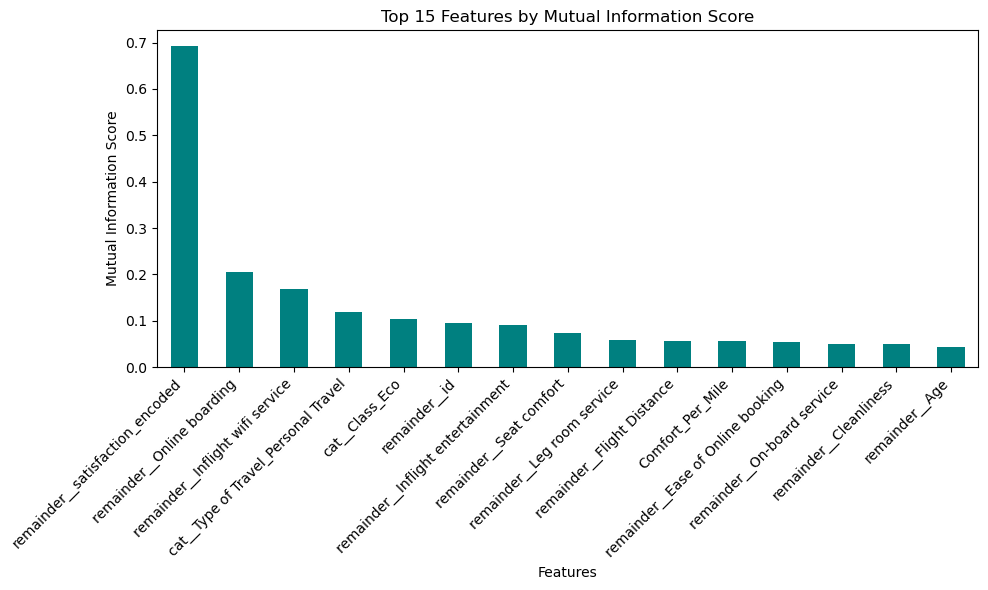

Selected features: ['cat__Type of Travel_Personal Travel', 'cat__Class_Eco', 'remainder__id', 'remainder__Age', 'remainder__Flight Distance', 'remainder__Inflight wifi service', 'remainder__Ease of Online booking', 'remainder__Online boarding', 'remainder__Seat comfort', 'remainder__Inflight entertainment', 'remainder__On-board service', 'remainder__Leg room service', 'remainder__Cleanliness', 'remainder__satisfaction_encoded', 'Comfort_Per_Mile']
Shape of selected features: (18875, 15)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif

df = pd.read_csv('feature_engineering.csv')

df = df.loc[:, ~df.columns.duplicated()]

X = df.drop('satisfaction_encoded', axis=1)
y = df['satisfaction_encoded']

plt.figure(figsize=(6, 4))
sns.countplot(x=y, hue=y, palette='viridis', legend=False)
plt.title('Target Variable Distribution (satisfaction_encoded)')
plt.xlabel('Satisfaction (0=Unsatisfied, 1=Satisfied)')
plt.ylabel('Count')
plt.show()


# Drop highly correlated features (threshold > 0.8)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
if to_drop:
    print(f"Dropping {len(to_drop)} highly correlated features: {to_drop}")
    X = X.drop(to_drop, axis=1)
else:
    print("No highly correlated features to drop (threshold > 0.8)")

# Feature selection using Mutual Information
selector = SelectKBest(score_func=mutual_info_classif, k=15)  # Select top 15 features
X_selected = selector.fit_transform(X, y)

# Get selected feature names and their scores
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask].tolist()
feature_scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)

# EDA: Visualize mutual information scores
plt.figure(figsize=(10, 6))
feature_scores[:15].plot(kind='bar', color='teal')
plt.title('Top 15 Features by Mutual Information Score')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print selected features and shape
print("Selected features:", selected_features)
print("Shape of selected features:", X_selected.shape)

# Convert to DataFrame for further processing
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Save selected features for the next step
X_selected_df.to_csv('selected_features.csv', index=False)